# Punto 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

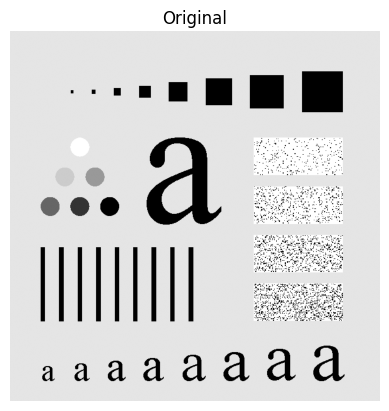

In [2]:
img = cv2.imread("Imagenes/Fig0448(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.show()

# Probamos la implementación de CV2, pero no se afectan los bordes

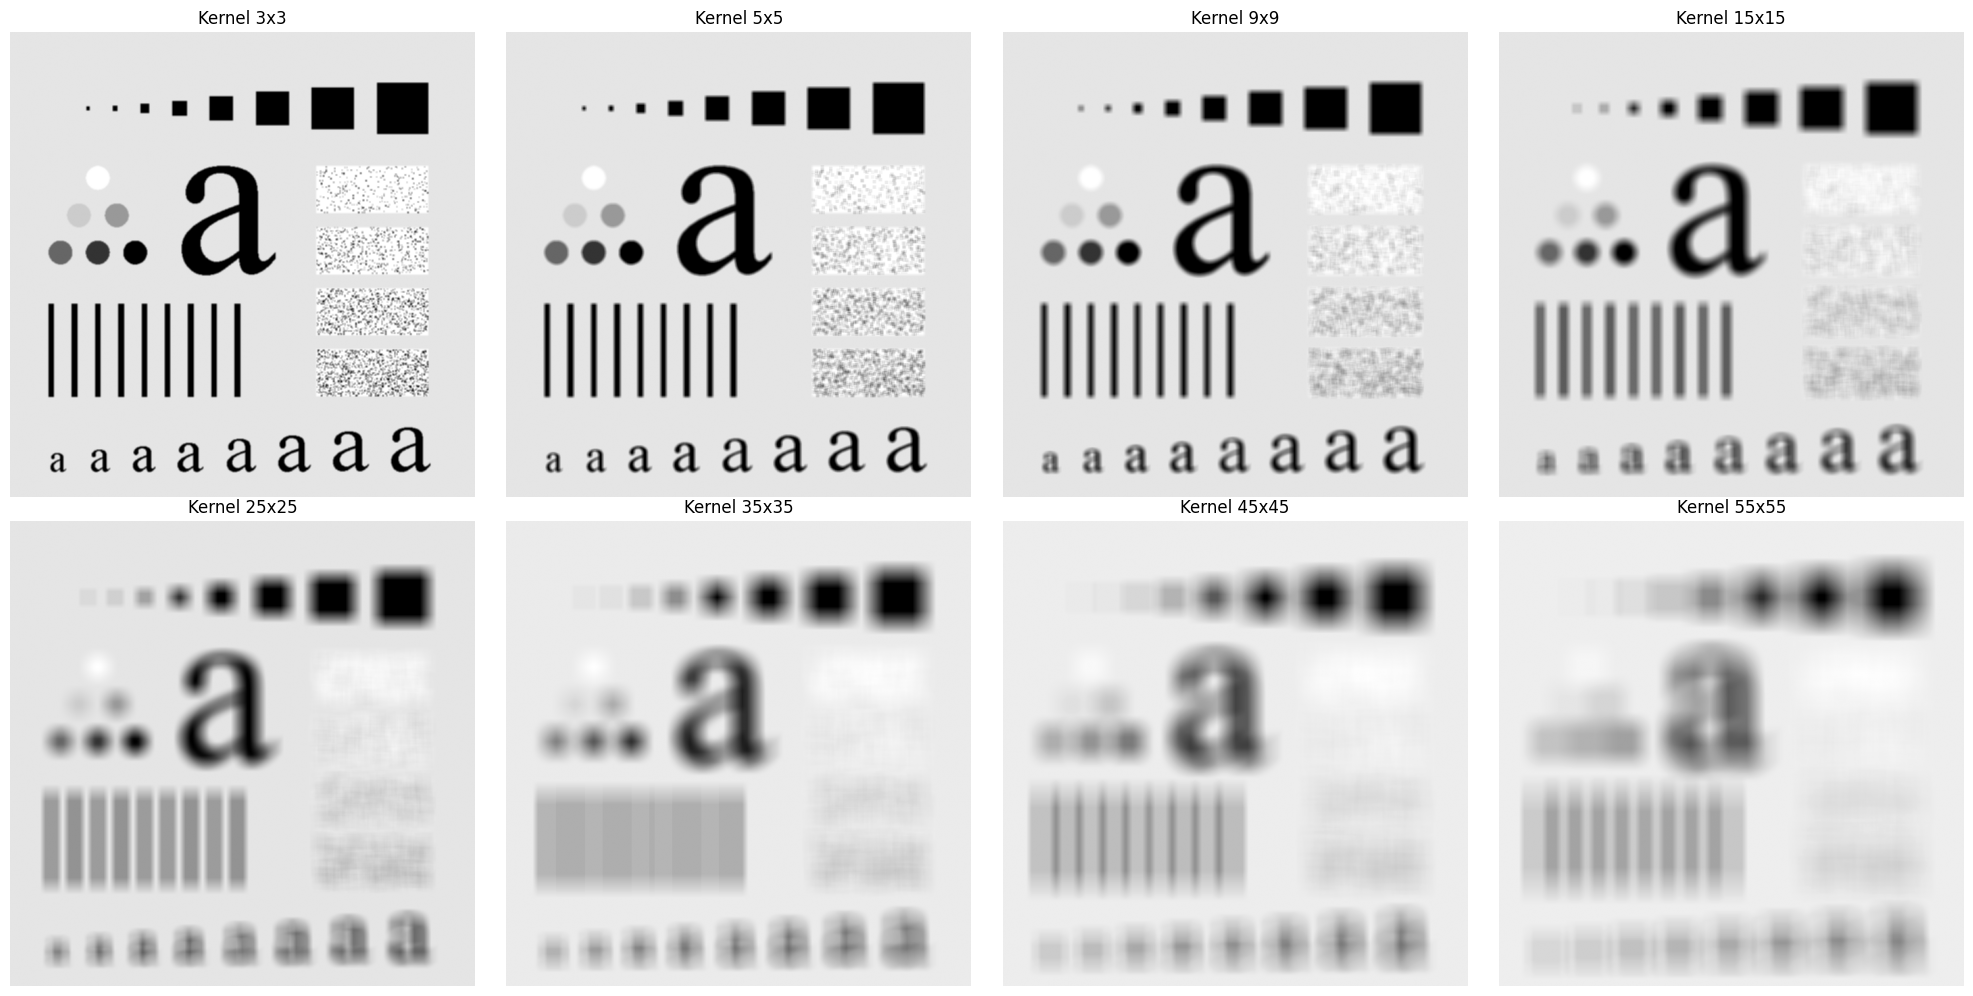

In [3]:
def create_kernel(dim):
    # Crea un kernel cuadrado de tamaño dim x dim donde cada celda tiene valor 1/(dim²)
    value = 1.0 / (dim * dim)
    kernel = np.full((dim, dim), value, dtype=np.float32)
    return kernel

n = [3,5,9,15,25,35,45,55]
filtered_imgs = []
for dim in n:
    kernel = create_kernel(dim)
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_imgs.append((dim, filtered))

# Mostrar todos los resultados
plt.figure(figsize=(20, 10))
for i, (dim, filtered) in enumerate(filtered_imgs):
    plt.subplot(2, 4, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kernel {dim}x{dim}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Nuestra implementación 

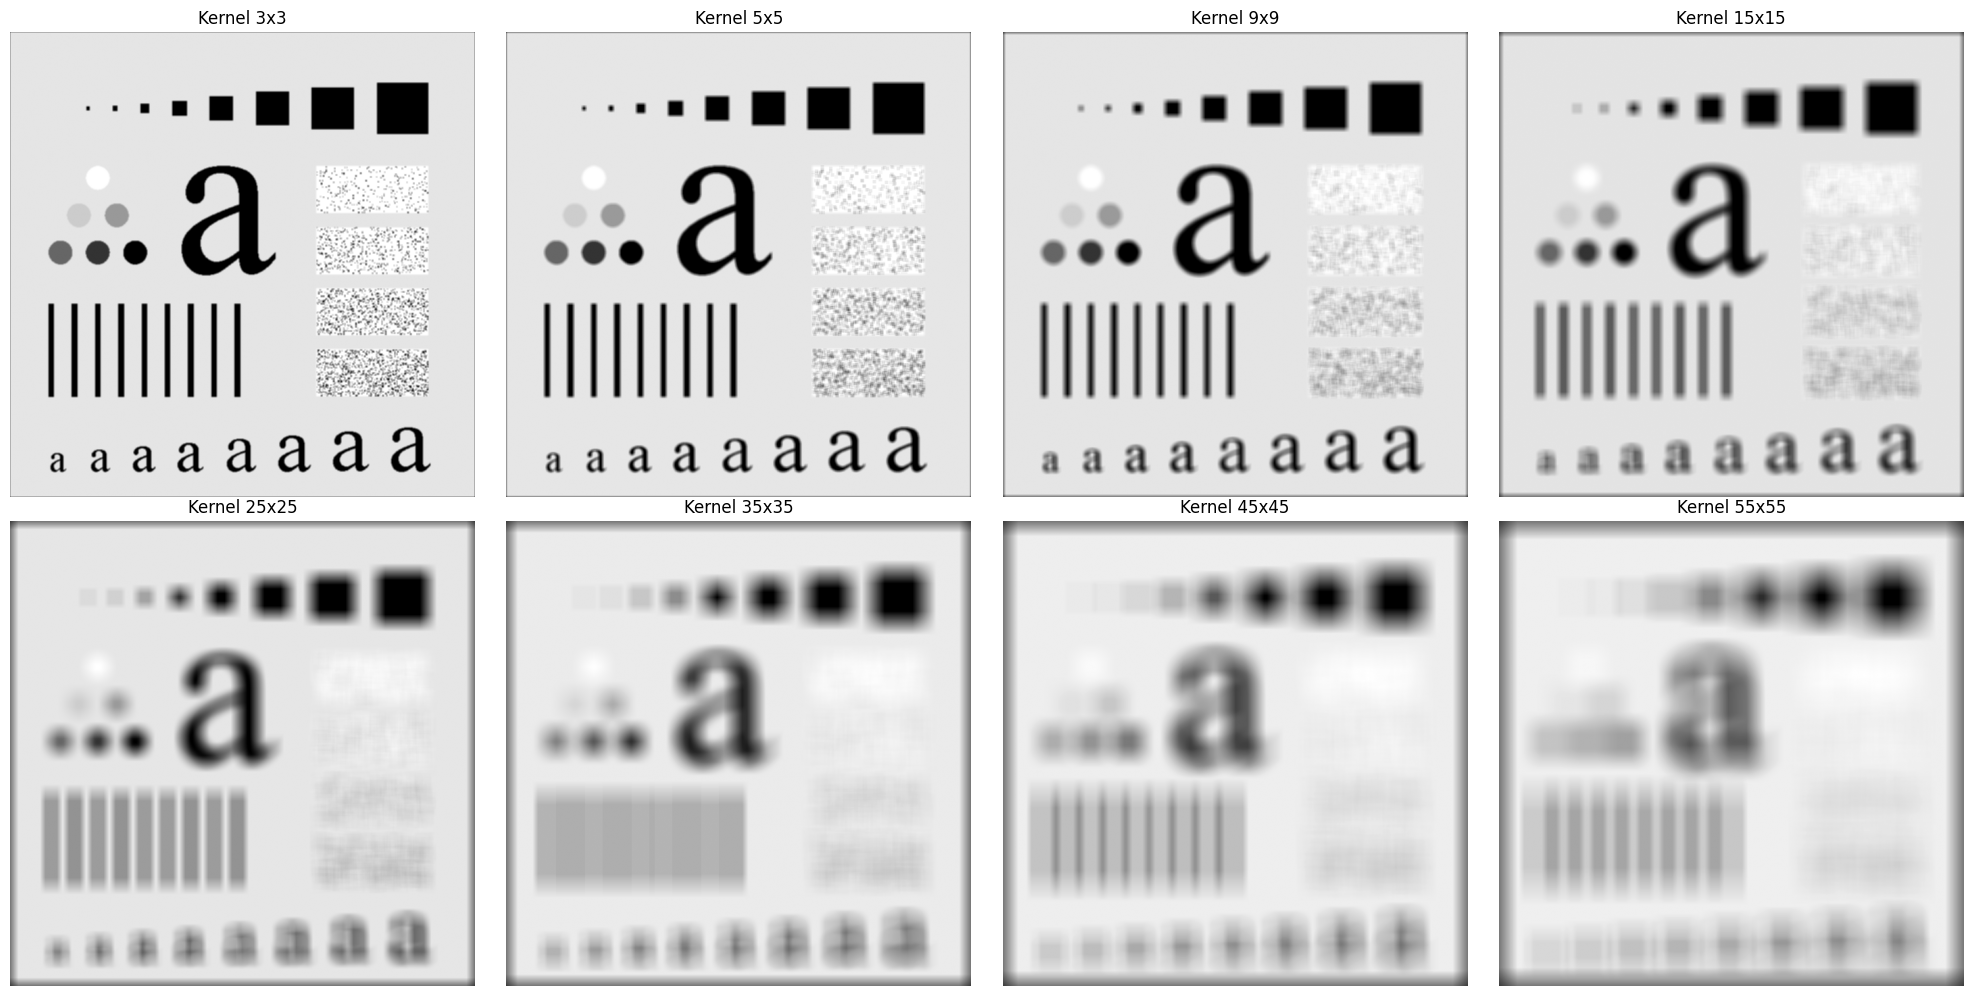

In [4]:
def manual_filter(img, kernel):
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2
    # Padding para bordes
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kh, j:j+kw]
            filtered[i, j] = np.sum(region * kernel)
    return filtered.astype(img.dtype)

filtered_imgs = []  # Reiniciar la lista antes de llenarla
for dim in n:
    kernel = create_kernel(dim)
    filtered = manual_filter(img, kernel)
    filtered_imgs.append((dim, filtered))

plt.figure(figsize=(20, 10))
for i, (dim, filtered) in enumerate(filtered_imgs):
    plt.subplot(2, 4, i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Kernel {dim}x{dim}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Punto 2

Alto: 1041, Ancho: 775


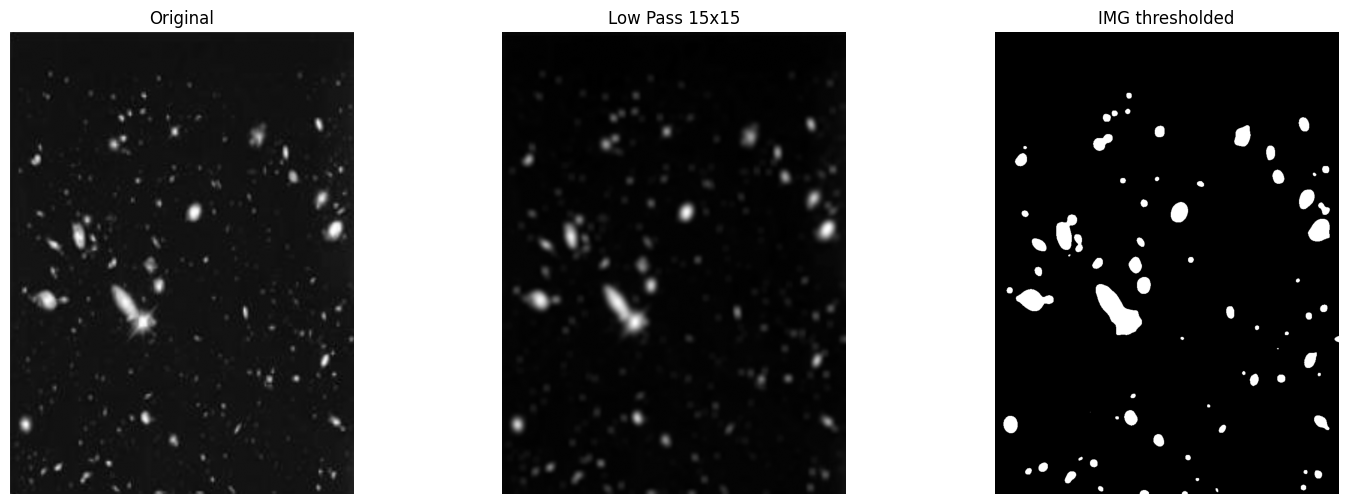

In [5]:
img = cv2.imread("Imagenes/stars.png", cv2.IMREAD_GRAYSCALE)

kernel = create_kernel(15)
filtered = cv2.filter2D(img, -1, kernel)

h, w = filtered.shape

filtered_copy = filtered.copy()

threshold = filtered_copy.max() * 0.25

print(f"Alto: {h}, Ancho: {w}")

for i in range(h):
    for j in range(w):
        if filtered_copy[i, j] < threshold:
            filtered_copy[i, j] = 0
        elif filtered_copy[i, j] >= threshold:
            filtered_copy[i, j] = 255
            
            
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered, cmap='gray')
plt.title('Low Pass 15x15')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_copy, cmap='gray')
plt.title('IMG thresholded')
plt.axis('off')

plt.show() 

# Punto 3

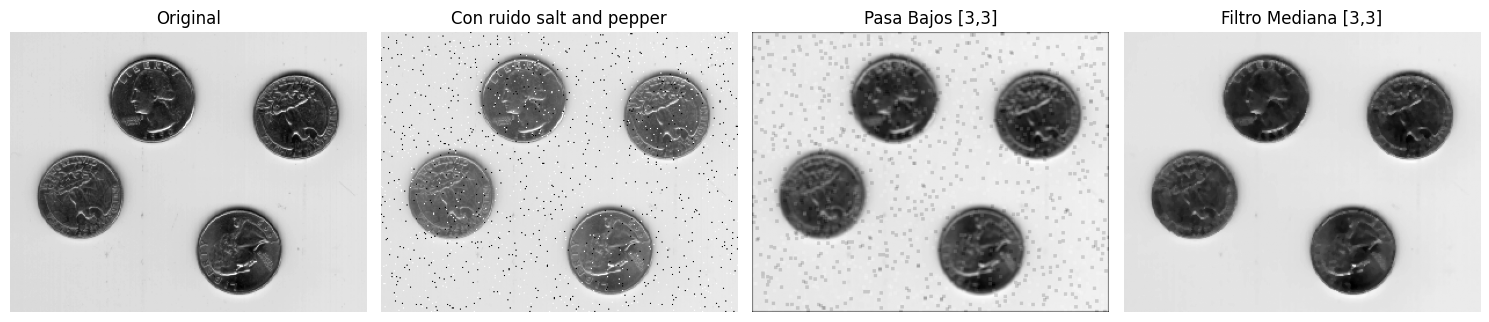

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Imagenes/eight.tif", cv2.IMREAD_GRAYSCALE)

#proporción de píxeles afectados por el ruido
amount = 0.02  # 5% de los píxeles
salt_vs_pepper = 0.5  # Proporción de sal y pimienta

noisy_img = img.copy()

num_salt = np.ceil(amount * img.size * salt_vs_pepper).astype(int)
num_pepper = np.ceil(amount * img.size * (1.0 - salt_vs_pepper)).astype(int)

#sal (blanco)
coords = [np.random.randint(0, i, num_salt) for i in img.shape]
noisy_img[coords[0], coords[1]] = 255

#pimienta (negro)
coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
noisy_img[coords[0], coords[1]] = 0

kernel = create_kernel(3)

denoised_img = manual_filter(noisy_img, kernel)

median_filtered_img = cv2.medianBlur(noisy_img, 3)

plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Con ruido salt and pepper')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(denoised_img, cmap='gray')
plt.title('Pasa Bajos [3,3]')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(median_filtered_img, cmap='gray')
plt.title('Filtro Mediana [3,3]')
plt.axis('off')

plt.tight_layout()
plt.show()

# Punto 4

Valor mínimo del laplaciano: -354.0
Valor máximo del laplaciano: 336.0


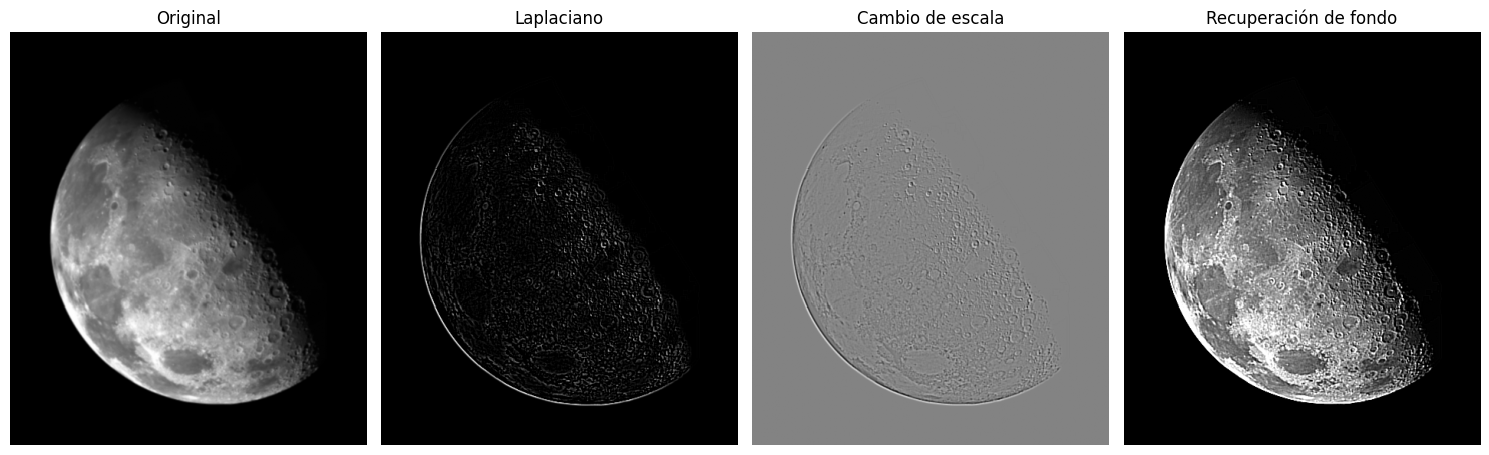

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Imagenes/blurry_moon.tif", cv2.IMREAD_GRAYSCALE)

#laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Convertir ambos arrays a int16 antes de restar
img_int16 = img.astype(np.int16)
laplacian_int16 = laplacian.astype(np.int16)
img_recuperada = cv2.subtract(img_int16, laplacian_int16)
img_recuperada = np.clip(img_recuperada, 0, 255).astype(np.uint8)

print(f"Valor mínimo del laplaciano: {laplacian.min()}")
print(f"Valor máximo del laplaciano: {laplacian.max()}")

# Mostrar resultados
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(laplacian, cmap='gray', vmin= 0, vmax=255)
plt.title('Laplaciano')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(laplacian, cmap='gray')
plt.title('Cambio de escala')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_recuperada, cmap='gray')
plt.title('Recuperación de fondo')
plt.axis('off')

plt.tight_layout()
plt.show()

# Punto 5: Hi Boost

La idea es que al restar la imagen "borrosa" o "promediada" a la imagen original escalada por A>1, se obtenga una imagen que tenga menos componentes de baja frecuencia (estamos restando la imagen filtrada con un filtro pasa bajos), por lo que la imagen resultante debería resaltar más sus componentes de alta frecuencia.

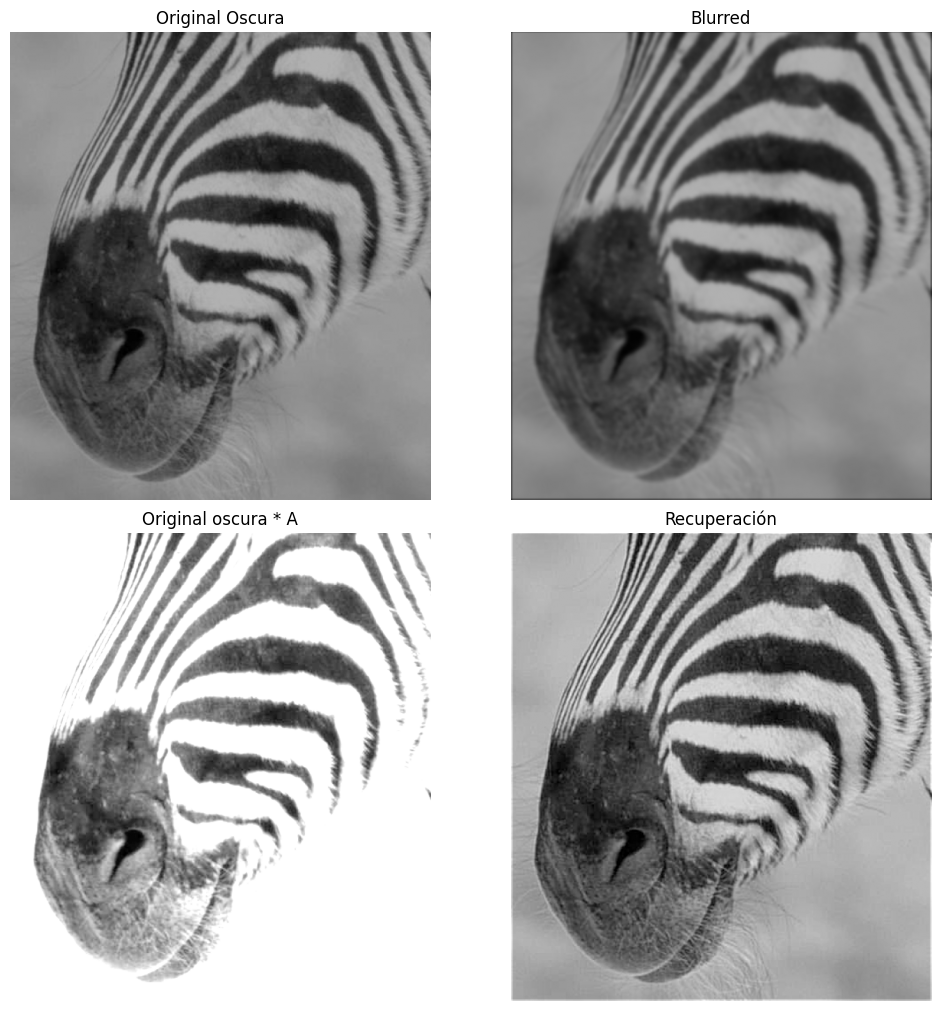

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

A=2.2

img = cv2.imread("Imagenes/zebra.png", cv2.IMREAD_GRAYSCALE)
img = img*0.7
kernel = create_kernel(7)
blurred = manual_filter(img, kernel)

scalated_img = A*img

recovered_img = cv2.subtract(scalated_img, blurred)

fig, axes = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)
ims = [img, blurred, scalated_img, recovered_img]
titles = ['Original Oscura', 'Blurred', 'Original oscura * A', 'Recuperación']
for ax, im, title in zip(axes.flatten(), ims, titles):
    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.show()


C:\Users\hertt\AppData\Local\Temp\ipykernel_50944\1029109039.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


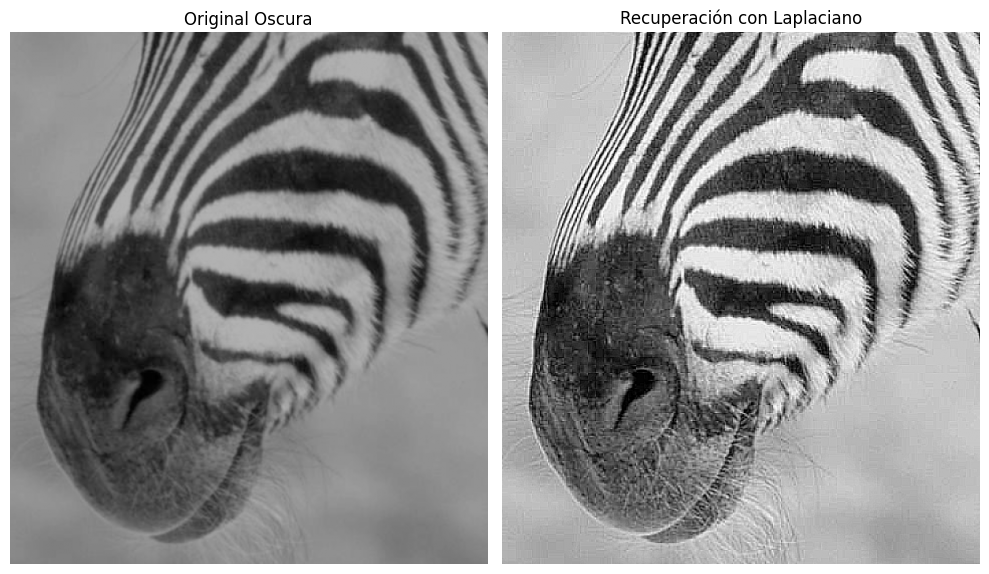

In [ ]:
#esto puede hacerse con el laplaciano, ya que la idea es incrementar las componentes de alta
#frecuencia, y además escalar el brillo con A. De esta forma, se podría hacer:

img = cv2.imread("Imagenes/zebra.png", cv2.IMREAD_GRAYSCALE)
img = img*0.7
A = 2.3
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
scalated_img = (A-1)*img
recovered_img = cv2.subtract(scalated_img, laplacian)

fig, axes = plt.subplots(1, 2, figsize=(10,10), constrained_layout=True)
ims = [img, recovered_img]
titles = ['Original Oscura', 'Recuperación con Laplaciano']
for ax, im, title in zip(axes.flatten(), ims, titles):
    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.show()

# Punto 6
Filtrado en el dominio de la frecuencia
Entendemos que la imagen de la diapositiva tiene escalas u offsets distintos, ya que con la función H que se muestra no se amplifica la iluminación (bajas frecuencias) y se atenúan las altas frecuencias, que es lo que parece pasar al observar la imagen más clara.

0.0 1.0


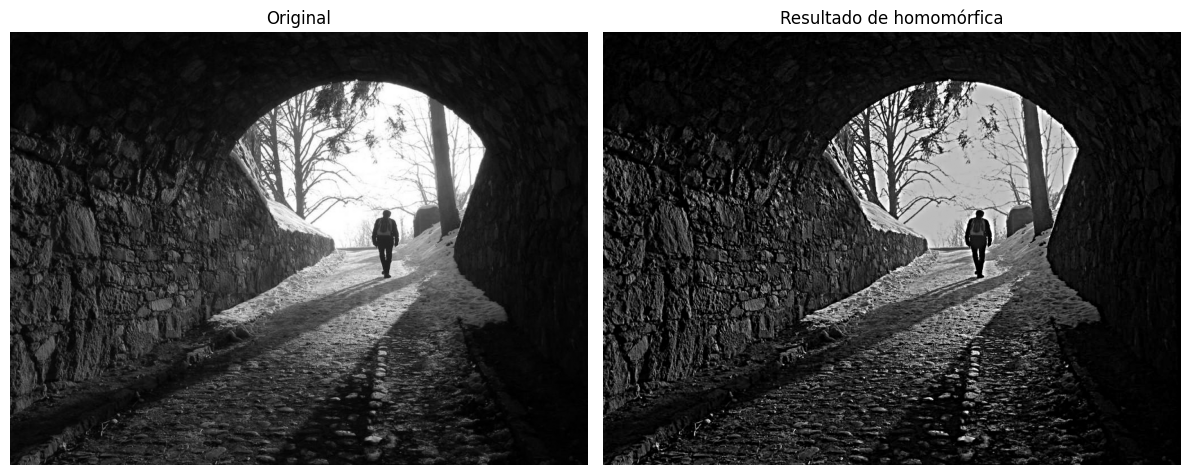

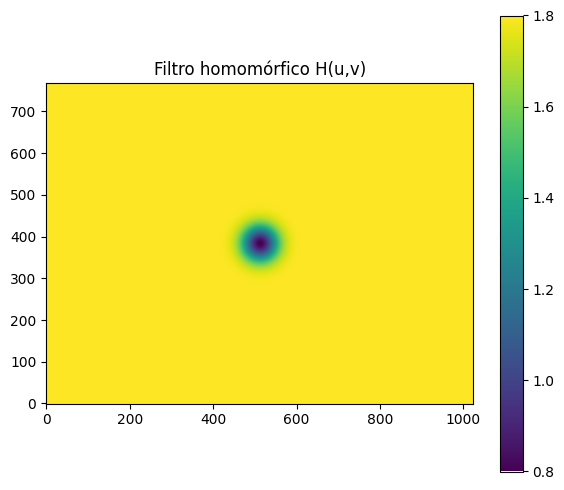

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#parámetros 
gamma_h = 1.8   #> 1
gamma_l = 0.8   #< 1
c       = 1.2   # pendiente de la transición
D0      = 45    # frecuencia de corte (en píxeles)

def homomorphic_H(M, N, gamma_h, gamma_l, c, D0):
    #intento de creación de espacio de frecuencias centrado
    u = np.arange(M) - M/2.0
    v = np.arange(N) - N/2.0
    V, U = np.meshgrid(v, u)    # (filas->U, columnas->V)
    D2 = U**2 + V**2
    H = (gamma_h - gamma_l) * (1.0 - np.exp(-(c * D2) / (D0**2))) + gamma_l
    return H

img = cv2.imread("Imagenes/tun.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
L = np.log1p(img)                           # ln(1+I)

#FFT centrada 
F = np.fft.fft2(L)
F = np.fft.fftshift(F)

M, N = img.shape
H = homomorphic_H(M, N, gamma_h, gamma_l, c, D0)

#filtrado 
G = H * F
#iFFT centrada
g = np.real(np.fft.ifft2(np.fft.ifftshift(G)))

out = np.expm1(g)                              # inversa del log1p= exp(g) - 1
out = np.clip(out, 0, 1)                       #casteo a [0,1]
print(out.min(), out.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.title('Resultado de homomórfica')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(6,5))
plt.imshow(H, origin='lower')   # 0 frecuencia al centro
plt.colorbar()
plt.title("Filtro homomórfico H(u,v)")
plt.tight_layout()
plt.show()


0.2579693976552759 1.0


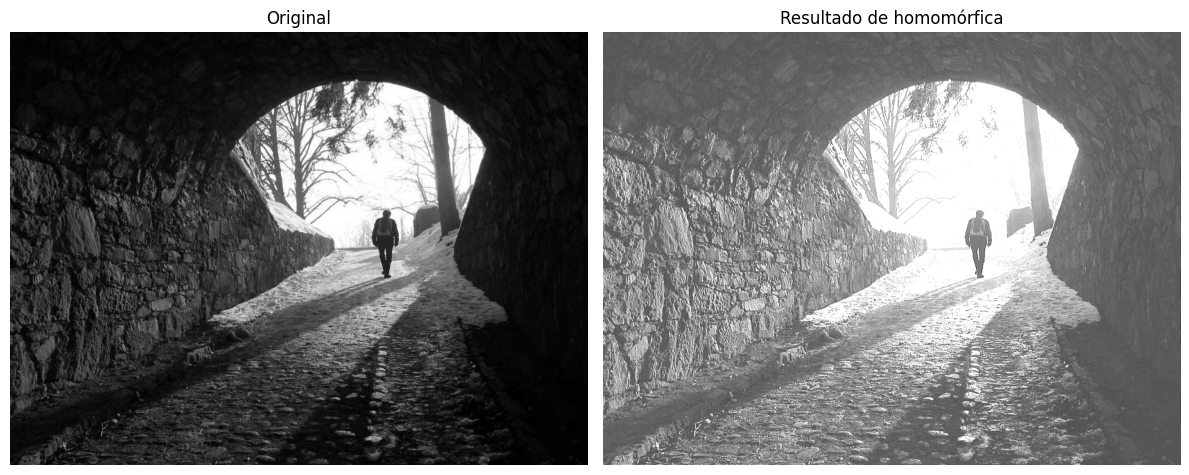

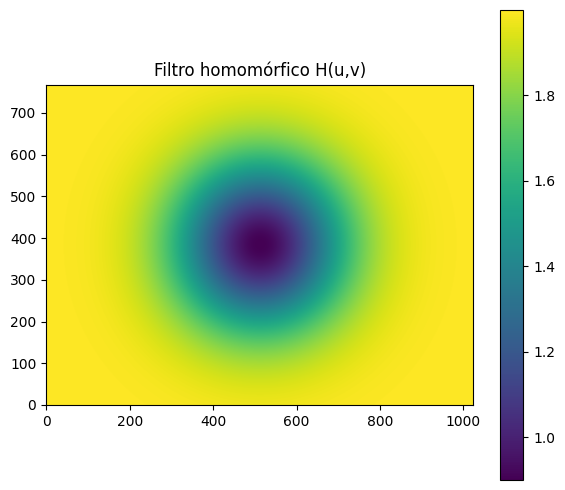

In [ ]:
#y si aplicamos un offset?
gamma_h = 2
gamma_l =0.9
c = 1
D0 = 200
H = homomorphic_H(M, N, gamma_h, gamma_l, c, D0)

#filtrado 
G = H * F
#inversa FFT centrada
g = np.real(np.fft.ifft2(np.fft.ifftshift(G)))

out = np.expm1(g)+0.5                               # inversa del log1p= exp(g) - 1
out = np.clip(out, 0, 1)                            #casteo a [0,1]
print(out.min(), out.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.title('Resultado de homomórfica')
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(6,5))
plt.imshow(H, origin='lower')   # 0 frecuencia al centro
plt.colorbar()
plt.title("Filtro homomórfico H(u,v)")
plt.tight_layout()
plt.show()


Los resultados tienen sentido. La imagen de la diapositiva parece tener un offset para "compensar" el brillo que perdió por atenuar la iluminación.

# Punto 7

Partiendo de $i(x,y)$, y aceptando que $F\{i(x,y)\} = I(u,v)$:

- $i_1(x,y) = i(x,y)*(-1)^{x+y}$
- $I_1(u,v) = F\{i(x,y)*(-1)^{x+y}\} = I(u-M/2, v-N/2)$
- $I_2(u,v) = I_1^*(u,v)$
- $i_2(x,y) = F^{-1}\{I_2(u,v)\} = F^{-1}\{I_1^*(u,v)\} = F^{-1}\{I^*(u-M/2, v-N/2)\}$

Teniendo en cuenta la propiedad de simetría de la DFT 2D: $F^{-1}\{I^*(u,v)\}=i^*(-x,-y)$

Y además teniendo en cuenta que antitransformar la función desplazada nos vuelve a dar el factor $(-1)^{x+y}$

Entonces:

- $i_2(x,y) = i_1^*(-x,-y) = i^*(-x,-y)\cdot (-1)^{-x-y}$
- $i'(x,y) = i_2(x,y)*(-1)^{x+y} = i^*(-x,-y)\cdot (-1)^{-x-y}\cdot (-1)^{x+y}$

Finalmente:

$$i'(x,y) = i^*(-x,-y)$$

Teniendo en cuenta que la imagen de entrada es real, se obtiene:

$$i'(x,y) = i(-x,-y)$$

C:\Users\hertt\AppData\Local\Temp\ipykernel_50944\1808147624.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


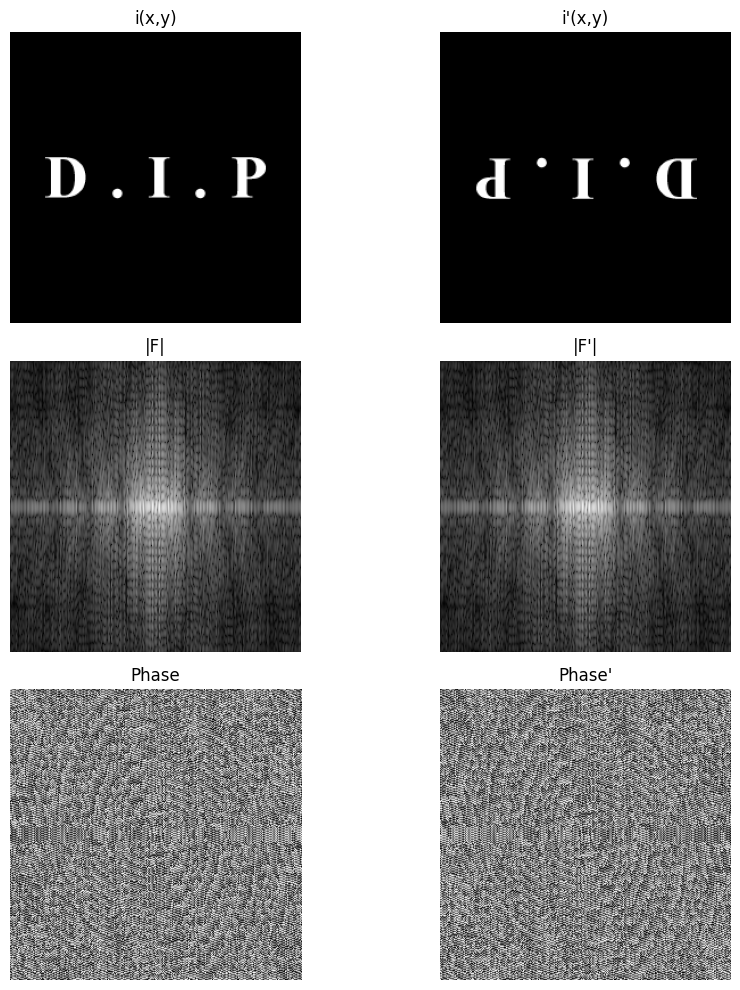

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Imagenes/DIPimage1.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

#máscara de centrado (-1)^(x+y) 
rows, cols = img.shape
x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)
mask = ((-1)**(X + Y)).astype(np.float32)   # valores ±1

# agrama en bloques 
i1 = img * mask                    #*(-1)^(x+y)
I1 = np.fft.fft2(i1)                  
I2 = np.conj(I1)                      
i2 = np.fft.ifft2(I2)                 
ip = (i2.real) * mask              #*(-1)^(x+y)
 

def mag_spectrum(im):
    F = np.fft.fft2(im)
    F = np.fft.fftshift(F)          
    M = np.abs(F)
    M_vis = np.log1p(M)             # visualización (log)
    return M, M_vis
def phase_spectrum(im):
    F = np.fft.fft2(im)
    F = np.fft.fftshift(F)          
    M = np.angle(F)
    return M

M0, M0_vis = mag_spectrum(img)
P0_vis = phase_spectrum(img)
M1, M1_vis = mag_spectrum(ip)
P1_vis = phase_spectrum(ip)

fig, axes = plt.subplots(3, 2, figsize=(10,10), constrained_layout=True)
ims = [img, ip, M0_vis, M1_vis, P0_vis, P1_vis]
titles = ['i(x,y)', "i'(x,y)", '|F|', "|F'|", 'Phase', 'Phase\'']
for ax, im, title in zip(axes.flatten(), ims, titles):
    ax.imshow(im, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()


Como se dedujo al encontrar la relación, el proceso permite espejar la imagen de entrada tanto vertical como horizontalmente, y debido a que los espectros únicamente difieren en que las señales de las que "provienen" son conjugadas, resultan ser idénticos ($|I'| = |I|$)
En este caso lo único que cambia es la fase, que está invertida 180° respecto a la original. Si bien en la representación no se nota, la fase' está espejada respecto de la original.